Dataset can be downloaded from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score

# Step 1: Load the dataset
data = pd.read_csv('./dataset/creditcard.csv')

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


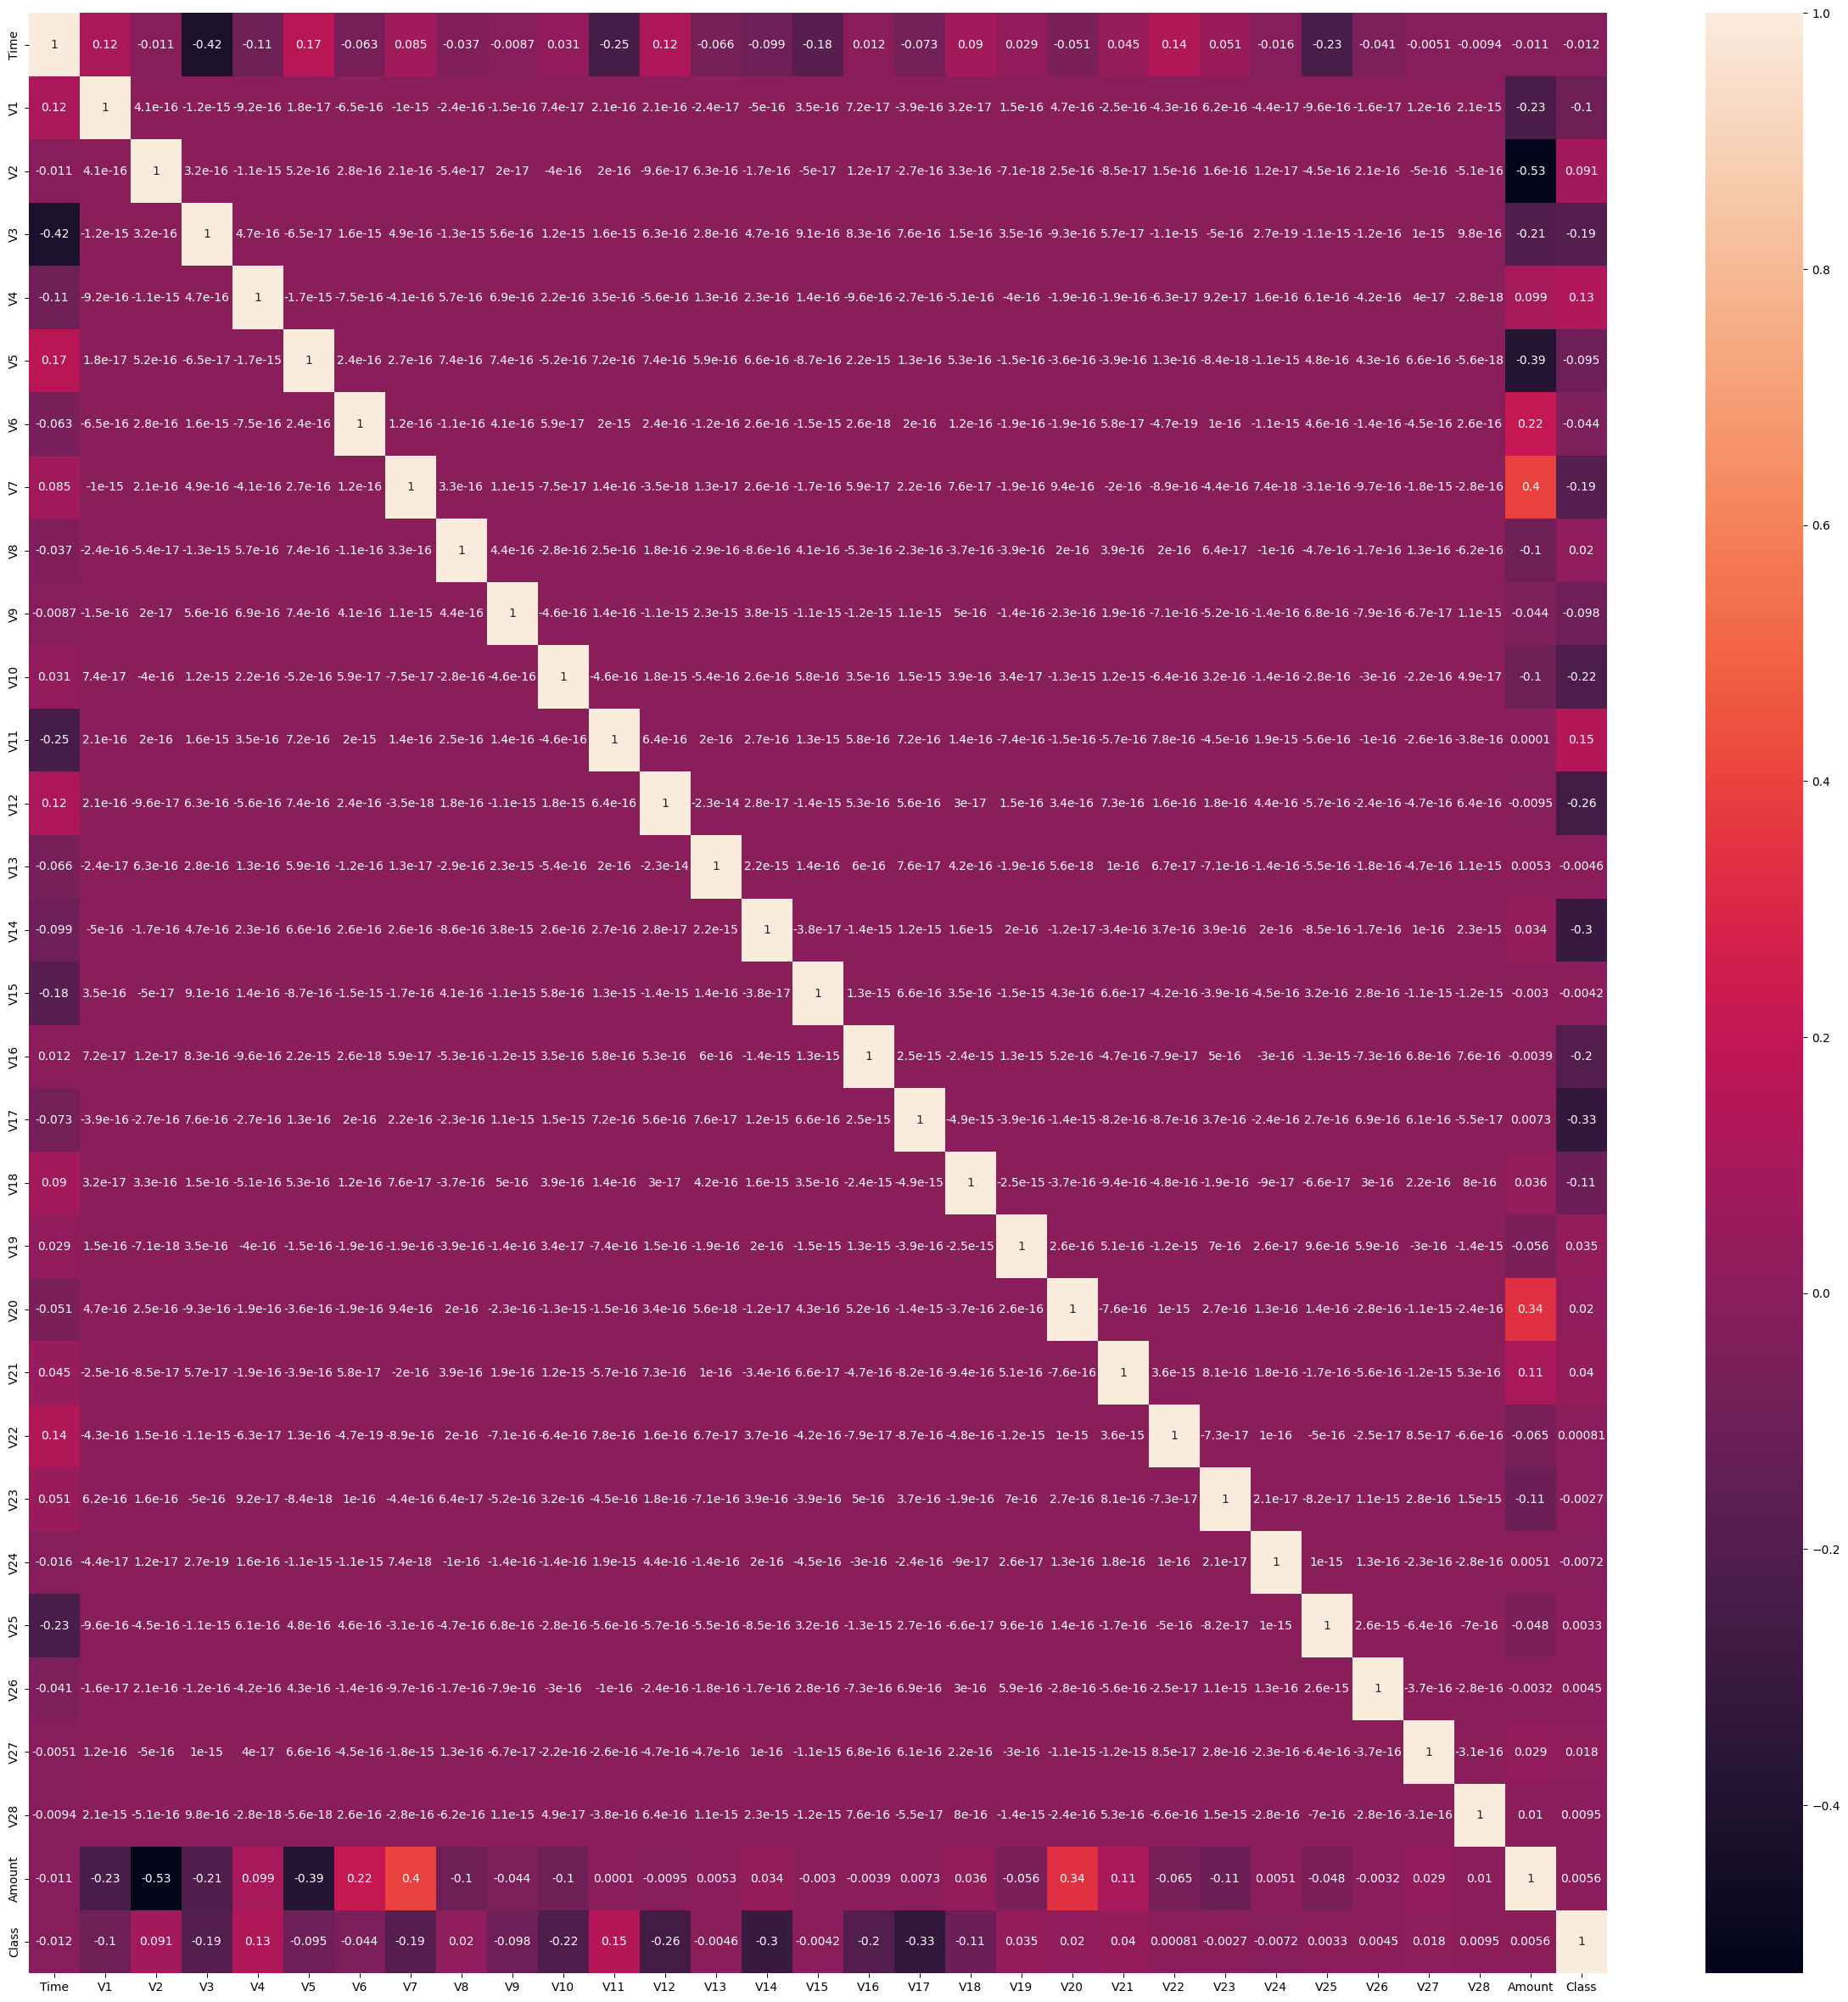

In [7]:
correl = data.corr()
plt.figure(figsize=(30, 30))  # Adjust figure size if needed
# Use a seaborn heatmap to see this better
sns.heatmap(correl, annot=True)

plt.show()

In [9]:
# Step 2: Data Preprocessing
X = data.drop(columns=['Class','V24','V25','V26','V27','V28','V22','V19','V15','V13','V9'])
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'k-NN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    #scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='average_precision') 
    results[name] = scores.mean()

# Display results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Average Precision'])
results_df.sort_values(by='Average Precision', ascending=False)

,Model,Average Precision
4,Random Forest,0.834702
2,SVM,0.810416
1,k-NN,0.799435
0,Logistic Regression,0.757633
3,Decision Tree,0.558698


In [11]:
# Finding out the default hyperparameters for RandomForestClassifier
modelx = RandomForestClassifier()
print(modelx.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



# Define the parameter grid including class_weight
param_grid = {
    'n_estimators': [100,150,200],          # Number of trees
    'max_features': ['sqrt', 'log2', None],   # Max features considered at each split
    'class_weight': [None,'balanced',              # Automatically assign class weights
                     {0: 1, 1: 10}]           # Manually assign greater weight to minority class
}


In [14]:
# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='average_precision',n_jobs = -1)


In [15]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced', {0: 1, 1: 10}],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 150, 200]},
             scoring='average_precision')

In [16]:

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate on test set
rf_predictions = grid_search.best_estimator_.predict(X_test)

Best parameters found:  {'class_weight': {0: 1, 1: 10}, 'max_features': 'log2', 'n_estimators': 200}


In [18]:
# Now that we have found out the best hyperparameters through GridSearch, the next time we want to train the model, we can just use this code
# which is using the best hyperparameters without needing to do GridSearch again. 

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, accuracy_score

rf_model = RandomForestClassifier(n_estimators=200,random_state=42,class_weight={0: 1, 1: 10}, max_features = 'log2')

rf_model = RandomForestClassifier()

# Step 5 : Train our model

rf_model.fit(X_train, y_train)

# Step 6 : Make predictions

rf_predictions = rf_model.predict(X_test)


[[56860     4]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.84      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962

AUPRC: 0.7981


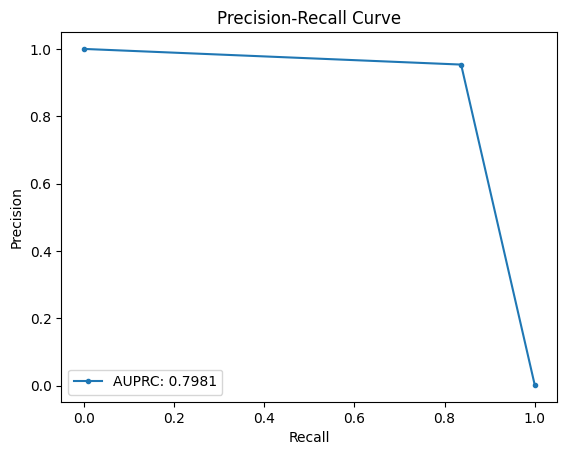

In [19]:
# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# Step 6: Calculate AUPRC (Area Under Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(y_test, rf_predictions)
auprc = average_precision_score(y_test, rf_predictions)
print(f"AUPRC: {auprc:.4f}")

# Step 7: Plot Precision-Recall Curve
plt.plot(recall, precision, marker='.', label=f'AUPRC: {auprc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

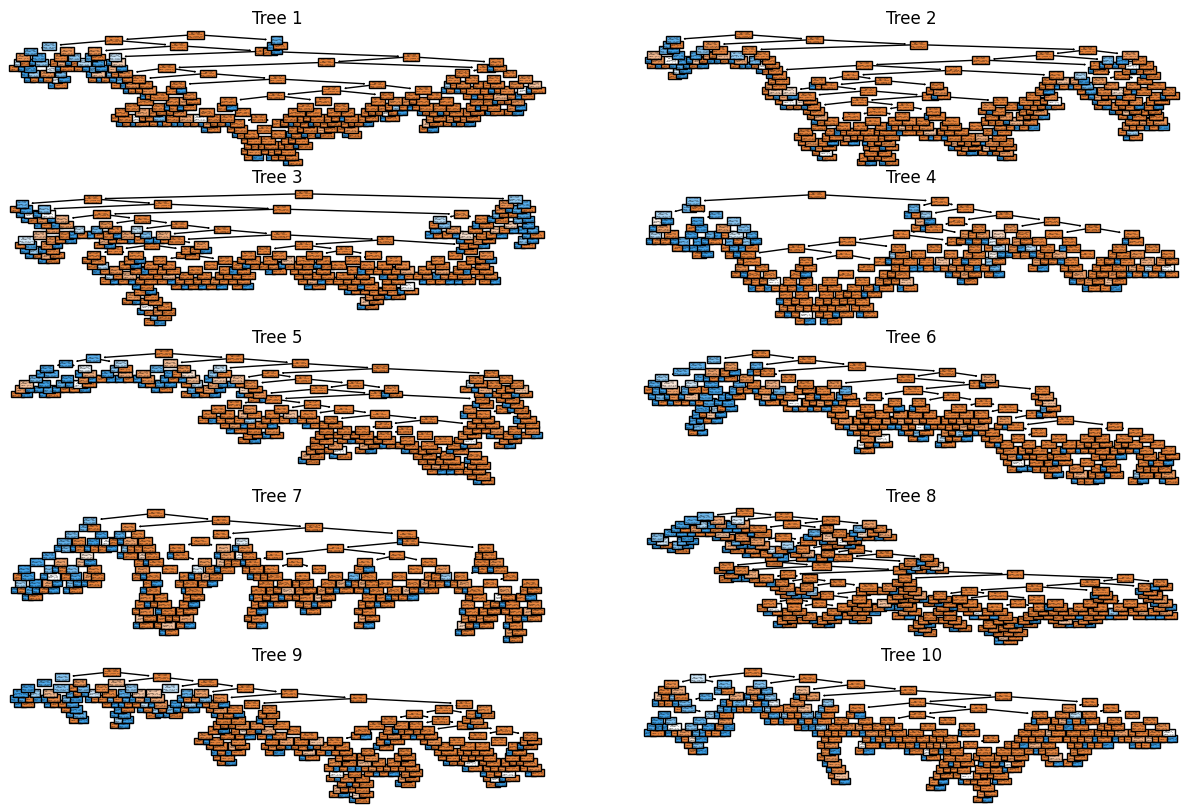

In [21]:
# Random forest visualization
from sklearn import tree

# Adjust the layout based on the number of trees
rows = 5  
cols = 2

# Plot each decision tree in the Random Forest

plt.figure(figsize=(15, 10))

for index in range(10):
    plt.subplot(rows, cols, index + 1)
    tree.plot_tree(rf_model.estimators_[index], filled=True, feature_names=list(X.columns), class_names=['Not Fraud', 'Fraud'])
    plt.title(f'Tree {index + 1}')

plt.savefig('random_forest.svg')
    
plt.show()